In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')



avg = 1
std_dev = .1
num_reps = 500
num_simulation = 1000

pct_to_target = np.random.normal(avg,std_dev, num_reps).round(2)
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_values
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)



df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04
    
    
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
# df

In [2]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulation):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [3]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,716,091.5","2,858,436.979","83,716,950.0"
std,"2,710,040.5630462295","102,247.27094275817","2,677,615.0432464746"
min,"75,466,750.0","2,538,242.0","75,500,000.0"
25%,"81,784,125.0","2,788,031.5","81,775,000.0"
50%,"83,723,000.0","2,860,535.0","83,712,500.0"
75%,"85,532,187.5","2,926,087.5","85,500,000.0"
max,"92,386,750.0","3,171,288.0","92,275,000.0"


<AxesSubplot:title={'center':'Total Commission Amount'}, ylabel='Frequency'>

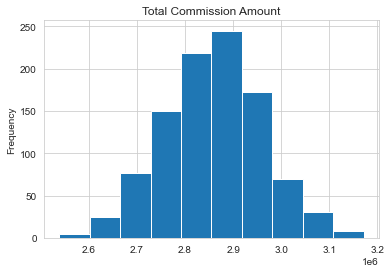

In [4]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")